In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1.10

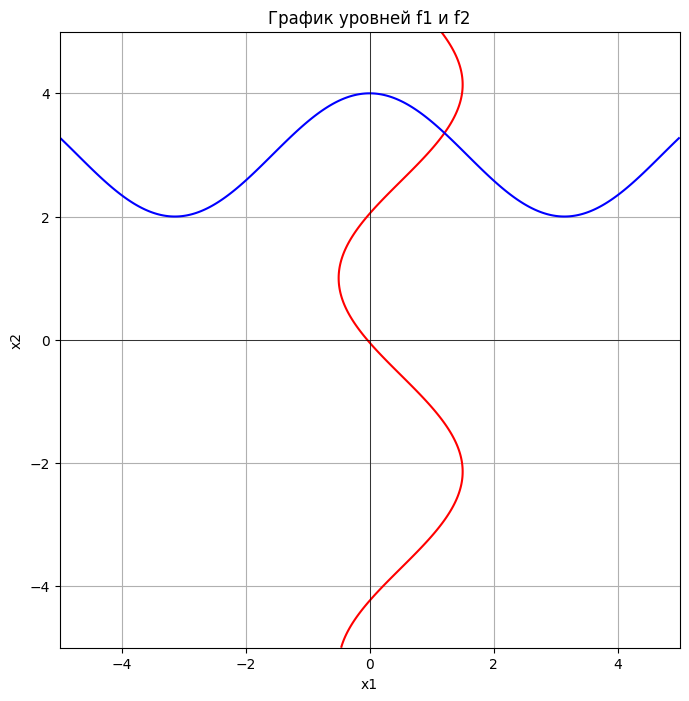

In [15]:
x1 = np.linspace(-5, 5, 400)
x2 = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1, x2)

def f1(x1, x2):
    return np.cos(x2 - 1) + x1 - 0.5

def f2(x1, x2):
    return x2 - np.cos(x1) - 3

F1 = f1(X1, X2)
F2 = f2(X1, X2)

plt.figure(figsize=(8, 8))
plt.contour(X1, X2, F1, levels=[0], colors='r')
plt.contour(X1, X2, F2, levels=[0], colors='b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("График уровней f1 и f2")
plt.show()



In [16]:
def f(x):
    x1, x2 = x
    return np.array([f1(x1, x2), f2(x1, x2)])

def J(x):
    x1, x2 = x
    return np.array([
        [1, -np.sin(x2 - 1)],
        [np.sin(x1), 1]
    ])

def newton_method(x0, eps):
    x = x0
    iteration = 0
    while True:
        iteration += 1
        delta = np.linalg.solve(J(x), -f(x))
        x = x + delta
        if np.linalg.norm(delta) < eps:
            break
    return x, iteration


In [17]:
initial_guesses = [np.array([0, 2]), np.array([-3, 2]), np.array([3, 2])]

results = []
for guess in initial_guesses:
    root, num_iterations = newton_method(guess, 1e-5)
    results.append((root, num_iterations))

for result in results:
    print(f"Корень: {result[0]}, Количество итераций: {result[1]}")


Корень: [1.20690682 3.35591174], Количество итераций: 5
Корень: [1.20690682 3.35591174], Количество итераций: 6
Корень: [1.20690682 3.35591174], Количество итераций: 6


In [18]:
from scipy.optimize import fsolve

roots_fsolve = []
for guess in initial_guesses:
    root = fsolve(f, guess)
    roots_fsolve.append(root)

print("Корни, найденные fsolve:")
for root in roots_fsolve:
    print(root)


Корни, найденные fsolve:
[1.20690682 3.35591174]
[1.20690682 3.35591174]
[1.20690682 3.35591174]


In [19]:
# 4.5.4

Ближайшая точка: [4.24754487 0.15118552 3.24763799]
Расстояние до ближайшей точки: 15.719828848210021


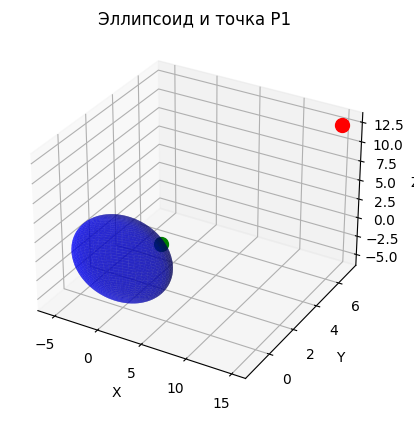

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Эллипсоидные параметры
a, b, c = 5.5, 1.3, 5.2

# Функция расстояния до эллипсоида
def distance_to_ellipse(point):
    def func(x):
        return np.sqrt((x[0] - point[0])**2 + (x[1] - point[1])**2 + (x[2] - point[2])**2)
    def cons(x):
        return (x[0]/a)**2 + (x[1]/b)**2 + (x[2]/c)**2 - 1  # Условие лежания на эллипсоиде
    x0 = np.array([a, b, c])  # начальное приближение
    res = minimize(func, x0, constraints={'type': 'eq', 'fun': cons})
    return res.fun, res.x  # возвращаем расстояние и точку на эллипсоиде

P1 = np.array([15, 7, 12.445])
dist, nearest_point = distance_to_ellipse(P1)

print("Ближайшая точка:", nearest_point)
print("Расстояние до ближайшей точки:", dist)

# Визуализация
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones_like(u), np.cos(v))

# Поверхность эллипсоида
ax.plot_surface(x, y, z, color='b', alpha=0.6)
# Точка P1
ax.scatter(*P1, color='r', s=100)
# Ближайшая точка
ax.scatter(*nearest_point, color='g', s=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Эллипсоид и точка P1')
plt.show()
